## Multinomial Logistic Regression

In [120]:
# Importing necessary modules
import tensorflow as tf
import numpy as np

tf.__version__

'2.3.0'

In [121]:
# preparing training data
x_train = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],
           [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_train = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0],
           [0, 1, 0], [1, 0, 0], [1, 0, 0]] # ont hot encoding

In [122]:
num_features = 4
num_classes = 3 # labels

# Initializing weights and biases
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.random.normal([num_classes]), name='bias')

# for cost plot
global cost_log
cost_log = np.array([])

In [123]:
# Hypothesis: Softmax regression H(x) = exp(logis) / reduce_sum(exp(logits, dim))
def softmax(X):
  linear = tf.matmul(tf.cast(X, dtype=tf.float32), W) + b
  return tf.nn.softmax(linear)

In [124]:
# Cost(loss) function: Cross entropy =  - Sum( y*log(H(x)) + (1-y) * log(1 - H(x)) ) / m
def cross_entropy(predicted, real):
  return -tf.reduce_mean(real * tf.math.log(predicted) + ( 1 - np.array(real)) * tf.math.log(1 - predicted))
  #return tf.reduce_mean(-tf.reduce_sum(real * tf.math.log(predicted))) # Same as above

In [125]:
# Optimizer: Gradient descent W = W - a(dy / dW), b = b - a(dy / db)
def gd(X, Y, learning_rate):
  # get gradient
  with tf.GradientTape(persistent=True) as g:
    pred = softmax(X)
    loss = cross_entropy(pred, Y)

  dy_dw = g.gradient(loss, W)
  dy_db = g.gradient(loss, b)
  #print('loss', loss.numpy())
 
  W.assign_sub(learning_rate * dy_dw)
  b.assign_sub(learning_rate * dy_db)
  
  return loss.numpy()

In [126]:
# training function
def train(x, y, learning_rate=0.01, epoch=200):
  for i in range(epoch):
    loss = gd(x, y, learning_rate)

    if (i+1) % 100 == 0:
      print ('{} - loss: {}'.format(i+1, loss))
    
    # for cost plot
    global cost_log
    cost_log = np.append(cost_log, np.array(loss))

In [127]:
# train
train(x_train, y_train, 0.02, 5000)
print('Model: \n Weight = {} \n bias = {}'.format(W.numpy(), b.numpy()[0])) # W=2, b=0

100 - loss: 0.7824332118034363
200 - loss: 0.5368564128875732
300 - loss: 0.4818345010280609
400 - loss: 0.4484436511993408
500 - loss: 0.4251505434513092
600 - loss: 0.4076787531375885
700 - loss: 0.3938847482204437
800 - loss: 0.38257601857185364
900 - loss: 0.37302908301353455
1000 - loss: 0.3647761344909668
1100 - loss: 0.3575010299682617
1200 - loss: 0.3509824275970459
1300 - loss: 0.34506139159202576
1400 - loss: 0.339620441198349
1500 - loss: 0.3345714509487152
1600 - loss: 0.32984694838523865
1700 - loss: 0.32539424300193787
1800 - loss: 0.3211718499660492
1900 - loss: 0.3171467185020447
2000 - loss: 0.31329214572906494
2100 - loss: 0.30958637595176697
2200 - loss: 0.3060115873813629
2300 - loss: 0.30255308747291565
2400 - loss: 0.2991986870765686
2500 - loss: 0.2959381937980652
2600 - loss: 0.2927631139755249
2700 - loss: 0.28966620564460754
2800 - loss: 0.28664153814315796
2900 - loss: 0.28368380665779114
3000 - loss: 0.2807885706424713
3100 - loss: 0.2779522240161896
3200 - 

In [131]:
# check prediction and accuracy
hypothesis = softmax(x_train)
pred = tf.math.argmax(hypothesis, 1)
real = tf.math.argmax(y_train, 1)

accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, real), tf.float32))
print('Hypothesis:', hypothesis.numpy())
print('Real:', real.numpy())
print('Pred:', pred.numpy())
print('Accuracy: {}%'.format(accuracy.numpy()*100))

Hypothesis: [[7.3791243e-04 1.4791290e-02 9.8447084e-01]
 [1.0335774e-03 1.5786140e-01 8.4110504e-01]
 [1.2627798e-04 3.1326893e-01 6.8660480e-01]
 [4.8331181e-05 7.1592468e-01 2.8402704e-01]
 [5.1634312e-01 4.2625031e-01 5.7406552e-02]
 [2.6251921e-01 7.3708290e-01 3.9789703e-04]
 [6.0732377e-01 3.9089528e-01 1.7809436e-03]
 [7.6428431e-01 2.3553011e-01 1.8560095e-04]]
Real: [2 2 2 1 1 1 0 0]
Pred: [2 2 2 1 0 1 0 0]
Accuracy: 87.5%


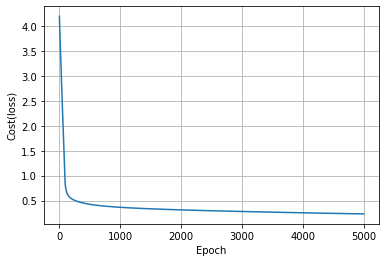

In [129]:
import matplotlib.pyplot as plt

# cost logs
plt.plot(range(len(cost_log)), cost_log)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Cost(loss)')
plt.show()